In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load the data
data = np.loadtxt('../logs/data.csv', delimiter=',')

# Number of environments
num_envs = 32
plot = False

df = pd.DataFrame(data, columns=['reset_buf', 'progress_buf', 'thrust1', 'thrust2', 'thrust3', 'thrust4',
                                 'drone_x', 'drone_y', 'drone_z', 'hoop_x', 'hoop_y', 'hoop_z', 'reward', 'collision', 'target'])

# Add columns for the environment number and split number
df['env_num'] = np.arange(len(df)) % num_envs
df['split_num'] = 0

# Update the split numbers
for i in range(0, num_envs):
    data_env = df[df['env_num'] == i]
    splits = np.where(data_env['reset_buf'] == 1)[0]
    for j, (start, end) in enumerate(zip(np.r_[0, splits+1], np.r_[splits+1, len(data_env)])):
        df.loc[data_env.index[start:end], 'split_num'] = j

df

,reset_buf,progress_buf,thrust1,thrust2,thrust3,thrust4,drone_x,drone_y,drone_z,hoop_x,hoop_y,hoop_z,reward,collision,target,env_num,split_num
0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-0.520746,-0.555458,0.949738,-0.283279,-2.225996,1.133172,1.546099,0.0,0.0,0,0
1,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.490176,-0.578826,1.665863,-0.402564,-2.160758,1.037765,0.802194,0.0,0.0,1,0
2,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.288068,0.336351,1.371516,-0.341399,-2.303468,1.146715,0.672996,0.0,0.0,2,0
3,0.0,2.0,4000.000000,0.000000,3023.699707,0.000000,-0.520746,-0.555458,0.950246,-0.283279,-2.225996,1.133172,1.546173,0.0,0.0,3,0
4,0.0,2.0,250.741867,0.000000,0.000000,3208.736572,1.490176,-0.578826,1.664992,-0.402564,-2.160758,1.037765,0.802311,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726,0.0,21.0,943.132385,1655.871704,519.872070,0.000000,1.030438,0.714281,1.263981,0.121245,-2.496618,1.013737,0.337236,0.0,0.0,22,3
4727,0.0,6.0,1450.800903,1277.917725,0.000000,0.000000,-1.255484,-0.548085,0.990117,0.432474,-2.095900,1.294104,0.946616,0.0,0.0,23,2
4728,0.0,53.0,685.082886,286.506683,793.488647,1140.305298,1.066173,0.445937,0.705463,-0.591670,-2.213933,1.068725,0.452788,0.0,0.0,24,2
4729,0.0,22.0,839.015259,2416.531494,836.123352,0.000000,1.026490,0.708666,1.259471,0.121245,-2.496618,1.013737,0.326210,0.0,0.0,25,5


In [25]:
df.to_csv('../logs/data_split.csv', index=False)

In [50]:
grouped = df.groupby(['env_num', 'split_num'])
# Define a function that checks if there's at least one collision in a group
def has_collision(group):
    return group['collision'].any()

# Group the data by environment and split, and apply the function
collision_groups = grouped.apply(has_collision)

# Count the number of splits with at least one collision per environment
collision_counts = collision_groups.groupby('env_num').sum()

# Count the number of splits per environment
split_counts = df.groupby('env_num')['split_num'].nunique()

# Calculate the rate of collision
collision_rate = collision_counts / split_counts

# Calculate the total number of collisions and splits
total_collisions = collision_counts.sum()
total_splits = split_counts.sum()

# Calculate the overall collision rate
overall_collision_rate = total_collisions / total_splits

print("Number of splits with at least one collision per environment:")
print(collision_counts)
print()

print("Rate of collision per environment:")
print(collision_rate)
print()

print("Overall collision rate:")
print(overall_collision_rate)

Number of splits with at least one collision per environment:
env_num
0     1
1     0
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    1
28    1
29    0
30    1
31    1
dtype: int64

Rate of collision per environment:
env_num
0     0.250000
1     0.000000
2     0.000000
3     0.000000
4     0.500000
5     0.000000
6     0.000000
7     0.200000
8     0.000000
9     0.000000
10    0.333333
11    0.000000
12    0.500000
13    0.333333
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.250000
20    0.000000
21    0.000000
22    0.250000
23    0.000000
24    0.000000
25    0.166667
26    0.000000
27    1.000000
28    0.500000
29    0.000000
30    0.333333
31    1.000000
dtype: float64

Overall collision rate:
0.13


In [51]:
# Define a function that checks if there's at least one target in a group
def has_target(group):
    return group['target'].any()

# Group the data by environment and split, and apply the function
target_groups = grouped.apply(has_target)

# Count the number of splits with at least one target per environment
target_counts = target_groups.groupby('env_num').sum()

# Calculate the rate of target per environment
target_rate = target_counts / split_counts

# Calculate the total number of targets
total_targets = target_counts.sum()

# Calculate the overall target rate
overall_target_rate = total_targets / total_splits

print("Number of splits with at least one target per environment:")
print(target_counts)
print()

print("Rate of target per environment:")
print(target_rate)
print()

print("Overall target rate:")
print(overall_target_rate)

Number of splits with at least one target per environment:
env_num
0     2
1     4
2     2
3     1
4     0
5     4
6     0
7     4
8     2
9     0
10    2
11    4
12    1
13    2
14    3
15    1
16    3
17    1
18    0
19    3
20    1
21    1
22    3
23    2
24    2
25    4
26    4
27    0
28    1
29    1
30    1
31    0
dtype: int64

Rate of target per environment:
env_num
0     0.500000
1     0.800000
2     0.666667
3     0.500000
4     0.000000
5     1.000000
6     0.000000
7     0.800000
8     0.666667
9     0.000000
10    0.666667
11    0.571429
12    0.500000
13    0.666667
14    0.600000
15    0.500000
16    0.750000
17    0.333333
18    0.000000
19    0.750000
20    0.500000
21    0.333333
22    0.750000
23    0.666667
24    0.666667
25    0.666667
26    0.800000
27    0.000000
28    0.500000
29    0.500000
30    0.333333
31    0.000000
dtype: float64

Overall target rate:
0.59


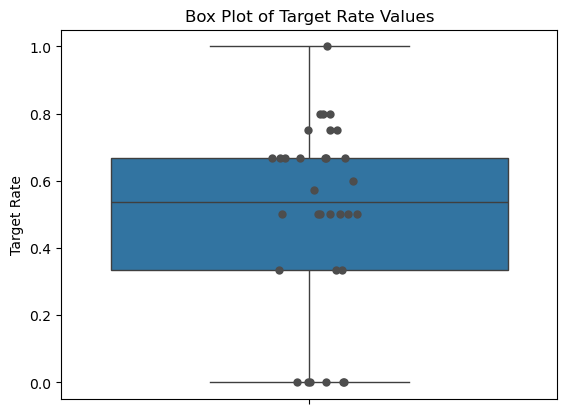

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=target_rate.values)

sns.stripplot(y=target_rate.values, size=6, color=".3")

plt.title('Box Plot of Target Rate Values')
plt.ylabel('Target Rate')

plt.show()

<AxesSubplot:>

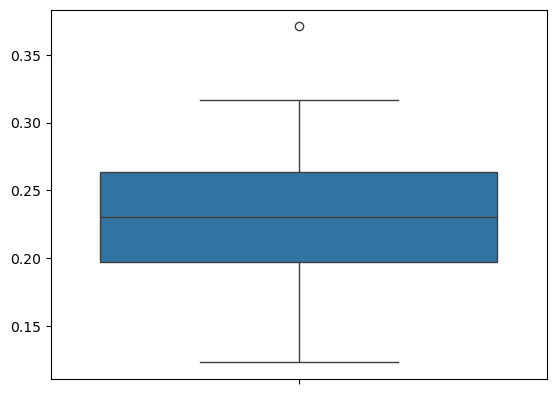

In [46]:
sns.boxplot(y=collision_rate.values)

In [53]:
# Filter the DataFrame to include only the rows where target is 1
df_target = df[df['target'] == 1]

# Get the statistics of the reward and progress_buf columns
reward_stats = df_target['reward'].describe()
progress_buf_stats = df_target['progress_buf'].describe()

print("Statistics of the reward column when target is 1:")
print(reward_stats)
print()

print("Statistics of the progress_buf column when target is 1:")
print(progress_buf_stats)

Statistics of the reward column when target is 1:
count       59.000000
mean     15005.039427
std          0.626813
min      15003.768555
25%      15004.412598
50%      15005.288086
75%      15005.533203
max      15005.823242
Name: reward, dtype: float64

Statistics of the progress_buf column when target is 1:
count     59.000000
mean      68.220339
std       16.609166
min       49.000000
25%       59.500000
50%       65.000000
75%       70.500000
max      140.000000
Name: progress_buf, dtype: float64


/tmp/ipykernel_83943/4231946818.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target['reward'], kde=False)


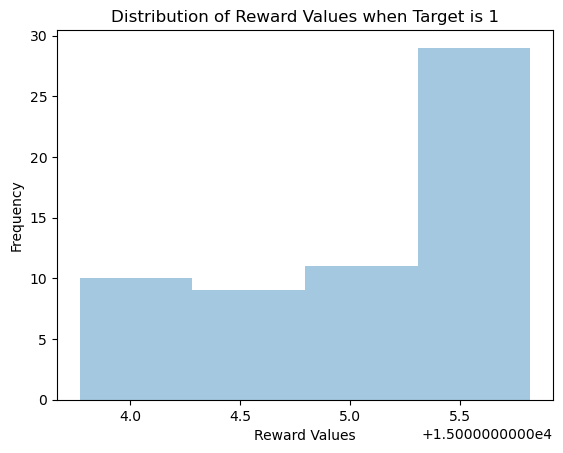

/tmp/ipykernel_83943/4231946818.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target['progress_buf'], kde=False)


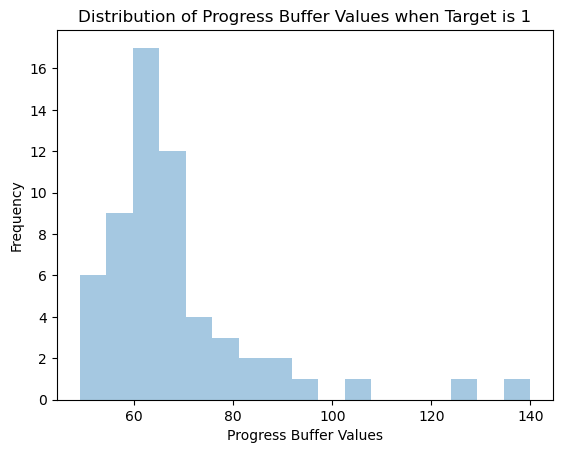

In [54]:
# Create a distribution plot of the reward column when target is 1
sns.distplot(df_target['reward'], kde=False)
plt.title('Distribution of Reward Values when Target is 1')
plt.xlabel('Reward Values')
plt.ylabel('Frequency')
plt.show()

# Create a distribution plot of the progress_buf column when target is 1
sns.distplot(df_target['progress_buf'], kde=False)
plt.title('Distribution of Progress Buffer Values when Target is 1')
plt.xlabel('Progress Buffer Values')
plt.ylabel('Frequency')
plt.show()